author: Ben

purpose: demonstrate common methods for characterizing data

## characterize the environment hosting the notebook

In [35]:
!hostname

9dfa42d6ec11


In [2]:
import sys
print('Python version:',sys.version)
#print('Python version info:',sys.version_info)

Python version: 3.6.6 | packaged by conda-forge | (default, Oct 12 2018, 14:08:43) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [3]:
!conda list ipython

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
ipython                   7.0.1           py36h24bf2e0_1000    conda-forge
ipython_genutils          0.2.0                      py_1    conda-forge


In [4]:
!jupyter --version

4.4.0


## load modules

In [5]:
import pandas
pandas.__version__

'0.23.4'

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn
seaborn.__version__

'0.9.0'

In [8]:
!pip install missingno

  Using cached https://files.pythonhosted.org/packages/57/eb/9d7d55ceec57e0e374e70e9ad8d16795ba91960a3c987f3b5ee71d3e8e4d/missingno-0.4.1-py3-none-any.whl


In [9]:
import missingno as msno # Download via https://github.com/ResidentMario/missingno 

In [10]:
import sys
import os
import time # alternative: https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/execute_time/readme.html

In [11]:
import requests
import numpy as np
from collections import Counter

## [optional] analyze data prior to Pandas

Download the file

In [12]:
with requests.Session() as s:
    file = s.get("https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv")

In [13]:
type(file)

requests.models.Response

convert downloaded content to file on disk

In [14]:
with open("mlb_players.csv", "w") as fcsv:
    fcsv.write(file.text)

Preview the content of the file on disk

In [15]:
!head -n 4 mlb_players.csv

"Name", "Team", "Position", "Height(inches)", "Weight(lbs)", "Age"
"Adam Donachie", "BAL", "Catcher", 74, 180, 22.99
"Paul Bako", "BAL", "Catcher", 74, 215, 34.69
"Ramon Hernandez", "BAL", "Catcher", 72, 210, 30.78


In [16]:
print('size of file on disk:',os.path.getsize("mlb_players.csv")/1000000,'MB')

size of file on disk: 0.05689 MB


read in file from disk without assuming format

In [17]:
with open("mlb_players.csv") as f:
    data = f.read()

how many characters are in the file?

In [18]:
len(data)

56890

what characters are in the file?

In [19]:
chars=[]
for c in data:
    chars.append(c)

char_list = list(set(chars))
char_list.sort()
char_list

['\n',
 ' ',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

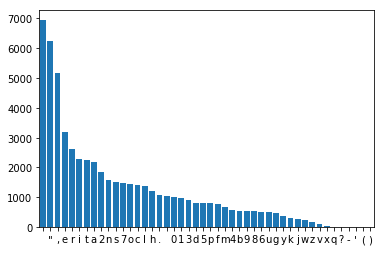

In [54]:
# from https://codereview.stackexchange.com/questions/129412/histogram-of-a-string
    
# generate histogram
letters_hist = dict(Counter(data.lower()))
#counts = letters_hist.values()
#letters = letters_hist.keys()

sorted_by_value = sorted(letters_hist.items(), key=lambda kv: kv[1],reverse=True)

counts=[]
letters=[]
for this_pair in sorted_by_value:
    letters.append(this_pair[0])
    counts.append(this_pair[1])

# graph data
bar_x_locations = np.arange(len(counts))
plt.bar(bar_x_locations, counts, align = 'center')
plt.xticks(bar_x_locations, letters)
#plt.grid()
plt.xlim(-0.5, len(counts) - 0.5)
plt.show()

## load data into pandas

In [34]:
# start a timer
start_t = time.time()

# load the data into a dataframe
df = pandas.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv", 
                     skiprows=[1035],
                     skipinitialspace=True)

print('elapsed time:',round(time.time() - start_t,4),'seconds')

elapsed time: 0.3264 seconds


how big is the file in memory?

In [32]:
print('size of dataframe in memory is',sys.getsizeof(df)/1000000,'MB')

size of dataframe in memory is 0.23074 MB


## what are the columns and their types?

In [22]:
# df.columns.tolist()
df.dtypes

Name               object
Team               object
Position           object
Height(inches)      int64
Weight(lbs)       float64
Age               float64
dtype: object

## what are the dimensions of the table?

In [23]:
rows, cols = df.shape

print ("Number of rows: ", rows)
print ("Number Of columns: ", cols)

Number of rows:  1034
Number Of columns:  6


## inspect the contents

In [24]:
df.head()
# if the number of columns is large, use the transpose
# df.head().T

,Name,Team,Position,Height(inches),Weight(lbs),Age
0,Adam Donachie,BAL,Catcher,74,180.0,22.99
1,Paul Bako,BAL,Catcher,74,215.0,34.69
2,Ramon Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin Millar,BAL,First Baseman,72,210.0,35.43
4,Chris Gomez,BAL,First Baseman,73,188.0,35.71


In [80]:
df.tail()

,Name,Team,Position,Height(inches),Weight(lbs),Age
1029,Brad Thompson,STL,Relief Pitcher,73,190.0,25.08
1030,Tyler Johnson,STL,Relief Pitcher,74,180.0,25.73
1031,Chris Narveson,STL,Relief Pitcher,75,205.0,25.19
1032,Randy Keisler,STL,Relief Pitcher,75,190.0,31.01
1033,Josh Kinney,STL,Relief Pitcher,73,195.0,27.92


In [25]:
df.describe(include = 'all')

,Name,Team,Position,Height(inches),Weight(lbs),Age
count,1034,1034,1034,1034.000000,1033.000000,1034.000000
unique,1032,30,9,NaN,NaN,NaN
top,Chris Young,NYM,Relief Pitcher,NaN,NaN,NaN
freq,2,38,315,NaN,NaN,NaN
mean,NaN,NaN,NaN,73.697292,201.689255,28.736712
std,NaN,NaN,NaN,2.305818,20.991491,4.320310
min,NaN,NaN,NaN,67.000000,150.000000,20.900000
25%,NaN,NaN,NaN,72.000000,187.000000,25.440000
50%,NaN,NaN,NaN,74.000000,200.000000,27.925000
75%,NaN,NaN,NaN,75.000000,215.000000,31.232500


Black column means entries have values; white columns = missing value.

The sparkline at right summarizes the general shape of the data completeness and points out the maximum and minimum rows.

This visualization will comfortably accommodate up to 50 labelled variables. Past that range labels begin to overlap or become unreadable, and by default large displays omit them.

See examples at https://github.com/ResidentMario/missingno

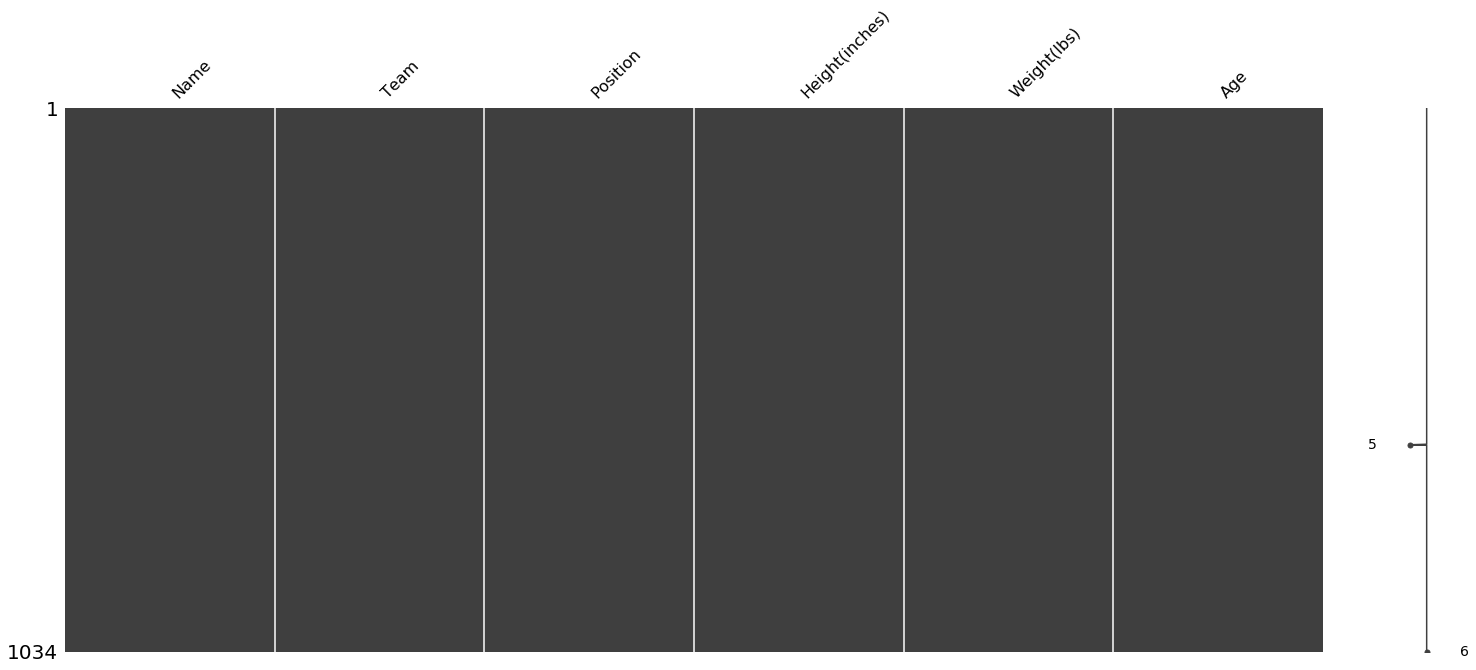

In [26]:
msno.matrix(df);

## unique entries per column

In [98]:
limit=10
for this_column in df.columns:
    print("==== ",this_column,"of type",(df[this_column]).dtypes,"has",df[this_column].nunique(),"unique entries ====")
    print("value    count")
    if (df[this_column].nunique()<limit):
        print(df[this_column].value_counts().head(limit).to_string())
    else:
        print(df[this_column].value_counts().head(limit-3).to_string())
        print('...')
        print(df[this_column].value_counts().tail(3).to_string())

====  Name of type object has 1032 unique entries ====
value    count
Chris Young         2
Tony Pe?a           2
Bobby Livingston    1
Renyel Pinto        1
Darin Erstad        1
Emiliano Fruto      1
Rocco Baldelli      1
...
Paul Byrd         1
Ivan Rodriguez    1
Nate McLouth      1
====  Team of type object has 30 unique entries ====
value    count
NYM    38
ATL    37
OAK    37
DET    37
BOS    36
CIN    36
WAS    36
...
STL    32
NYY    32
ARZ    28
====  Position of type object has 9 unique entries ====
value    count
Relief Pitcher       315
Starting Pitcher     221
Outfielder           194
Catcher               76
Second Baseman        58
First Baseman         55
Shortstop             52
Third Baseman         45
Designated Hitter     18
====  Height(inches) of type int64 has 17 unique entries ====
value    count
74    175
73    167
75    160
72    152
76    103
71     89
77     57
...
82    2
81    2
83    1
====  Weight(lbs) of type float64 has 89 unique entries ====
value   

## histogram of single numeric array

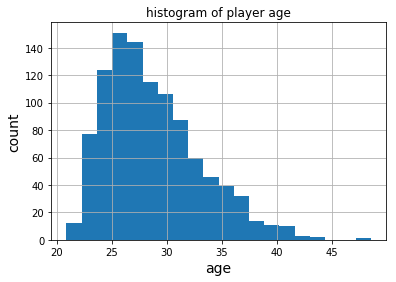

In [28]:
_=df['Age'].hist(bins=20)
_=plt.xlabel('age',fontsize=14)
_=plt.ylabel('count',fontsize=14)
_=plt.title('histogram of player age')

## for numeric columns, what is the distribution of leading digits?

https://en.wikipedia.org/wiki/Benford%27s_law

http://www.washingtonpost.com/wp-dyn/content/article/2009/06/20/AR2009062000004.html?noredirect=on
https://www.reddit.com/r/learnpython/comments/4hml8o/how_to_create_a_benfords_law_test_with_pandas/

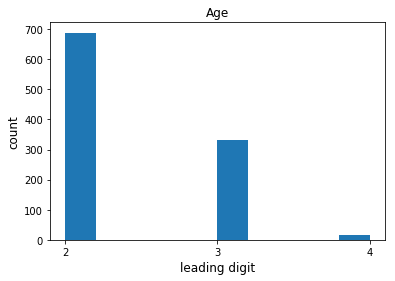

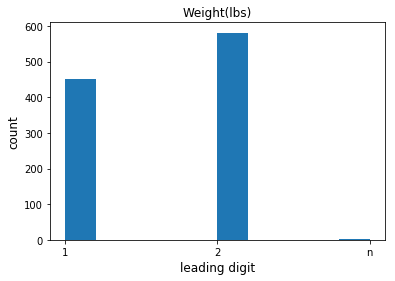

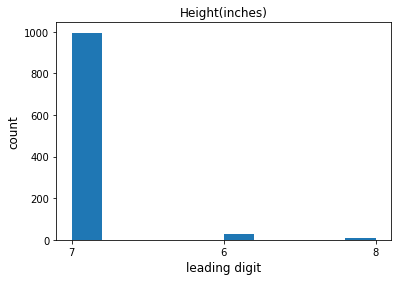

In [78]:
for this_col in ['Age','Weight(lbs)','Height(inches)']:
    first_digit_list=[]
    for this_val in list(df[this_col]):
        first_digit_list.append(str(this_val)[0])
    
    _=plt.hist(first_digit_list)
    _=plt.xlabel('leading digit',fontsize=12)
    _=plt.ylabel('count',fontsize=12)
    _=plt.title(this_col,fontsize=12)
    _=plt.show()

## correlation
[Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is 
 - +1 in the case of a perfect direct (increasing) linear relationship (correlation)
 - −1 in the case of a perfect decreasing (inverse) linear relationship (anticorrelation)
 - zero for uncorrelated

In [29]:
df.corr()

,Height(inches),Weight(lbs),Age
Height(inches),1.000000,0.531886,-0.073670
Weight(lbs),0.531886,1.000000,0.158282
Age,-0.073670,0.158282,1.000000


visualization of correlation for 2 variables, along with respective histograms

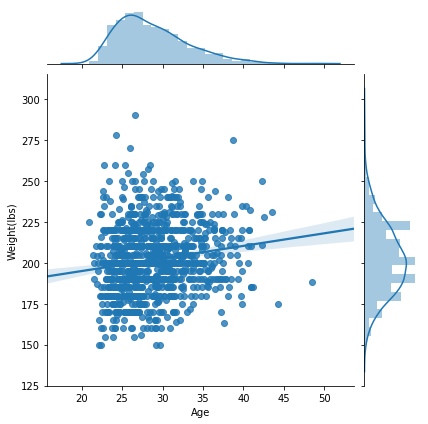

In [30]:
_=seaborn.jointplot("Age","Weight(lbs)",data=df,kind="reg")

visualization of correlation for pairs of variables, along with respective histograms

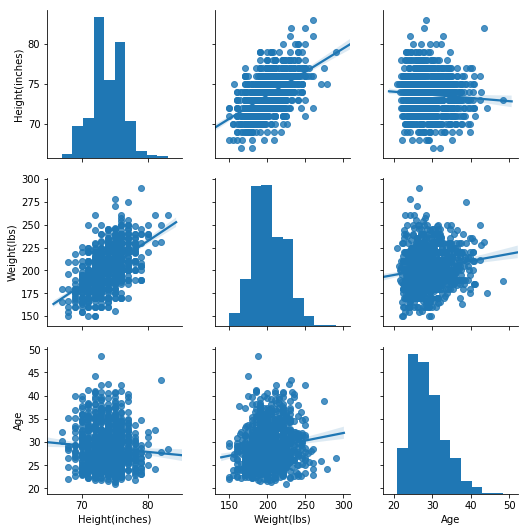

In [101]:
_=seaborn.pairplot(df.dropna(), kind="reg")
plt.show()